# Семинар 4
Мощность, MDE, необходимый размер выборки, оценка корректности критерия

### Что влияет на время эксперимента?

- Размер выборки
    - Ошибка 1 рода ($\alpha$)
    - Ошибка 2 рода ($\beta$)
    - Минимальный детектируемый эффект (MDE)
- Дисперсия
- Сезонность

### Мощность (power) и О2Р

Способность увидеть значимые различия в метрике там, где они на самом деле есть
> мощность = чувствительность

P(принять $H_1$ | верна $H_1$) = 1 - P($\beta$) = 1 - P(принять $H_0$ | верна $H_1$)


Высокая мощность метрики позволяет:
- видеть достаточно маленькие изменения
- или использовать меньше данных

**Пример**
<blockquote>
Берем уровень мощности в 80%

Тогда из 1000 экспериментов с реальным приростом в метрике в 800 мы увидим эффект, а в остальных 200 -- нет
</blockquote>

Чем выше уровень мощности, тем меньше хороших экспериментов будут
ошибочно забыты



### Уровень значимости и О1Р

Когда принимается решение о результатах эксперимента, считается, что в первую очередь нужно смотреть на p-value (ошибка I рода или false positive): вероятность отклонить нулевую гипотезу при условии, что она верна

P(принять $H_0$ | верна $H_0$) = 1 - P($\alpha$) = 1 - P(принять $H_1$ | верна $H_0$)

**Пример**
<blockquote>
Берем уровень значимости 95%

Тогда из 1000 экспериментов без эффекта, в 50 мы увидим эффект
</blockquote>

Чем выше уровень значимости, тем меньше бесполезных экспериментов будут выкатываться в продакшн

#### Можем ли придумать ситуацию, в которой контролировать ошибку 2 рода важнее, чем ошибку 1-го?

- Тест на наличие заболевания:
    - О1Р: нашли заболевание у здорового
    - О2Р: не нашли заболевание у больного
- Антифрод:
    - О1Р: посчитали обычную транзакцию фродом
    - О2Р: упустили мошенническую транзакцию

#### Как еще можно представлять в голове О1Р vs О2Р

|   |Actual Positive|Actual Negative|
|---|---|---|
|**Predicted Positive**|TP|FP (type I error)|
|**Predicted Negative**|FN (type II error)|TN|

<img src="distr.png" alt="distr" width="500"/>

### MDE
Минимальный размер эффекта (разница между контрольной и тестовой группой), который тест способен обнаружить с заданной мощностью и уровнем значимости.

- если p-value > alpha (уровень значимости), то это не значит,
что нет эффекта. Эффект может быть, но не больше, чем MDE с заданной О1Р,
мощностью и посчитанной дисперсией
- MDE считается для конкретных альфа, бетты, размера выборки и
дисперсии. То есть MDE может варьироваться в зависимости от заданных вами альфы и
бетты.
- в формуле MDE используется конкретное распределение
метрики. MDE будет считаться по-разному для разных критериев: t-критерий, хи-квадрат
и т.д.

### Как рассчитать необходимый размер выборки?

Размер выборки (в каждой группе) - это $n$ из нашей статистики

Two-sample t-test (same variance):
- $H_0: \mu_1 = \mu_2$
- $H_1: \mu_1 > \mu_2$

По ЦПТ  $\bar{X}\sim N\big(\mu_1 - \mu_2; \frac{2\sigma^2}{n}\big)$

Тогда наша статистика 
$$Z = \frac{\bar{X} - (\mu_1 - \mu_2)}{\sigma\sqrt{2}/\sqrt{n}}
\sim N(0; 1)$$

Ошибка второго рода:

$$\beta = P(\text{принять}\;H_0\;|\;\text{верна}\;H_1) = P\big(\big|\frac{\bar{X}}{\sigma\sqrt{2}/\sqrt{n}}\big| \leq Z_{\alpha/2}\big) = $$

$$= P\big(-Z_{\alpha/2} \leq \frac{\bar{X}}{\sigma\sqrt{2}/\sqrt{n}} \leq Z_{\alpha/2}\big) = $$

$$= P\big(-Z_{\alpha/2} - \frac{\mu_1 - \mu_2}{\sigma\sqrt{2}/\sqrt{n}} \leq \frac{\bar{X} - (\mu_1 - \mu_2)}{\sigma\sqrt{2}/\sqrt{n}} \leq Z_{\alpha/2} - \frac{\mu_1 - \mu_2}{\sigma\sqrt{2}/\sqrt{n}}\big) = $$

$$= \Phi\big(Z_{\alpha/2} - \frac{\mu_1 - \mu_2}{\sigma\sqrt{2}/\sqrt{n}}\big) - \Phi\big(-Z_{\alpha/2} - \frac{\mu_1 - \mu_2}{\sigma\sqrt{2}/\sqrt{n}}\big)$$

Второе слагаемое is very smol:
$$\Phi\big(-Z_{\alpha/2} - \frac{\mu_1 - \mu_2}{\sigma\sqrt{2}/\sqrt{n}}\big) < \Phi(-Z_{\alpha/2})\approx 0$$

По определению: $\beta=\Phi(-Z_{\beta})$

Тогда $-Z_{\beta}=Z_{\alpha/2}-\frac{\mu_1-\mu_2}{\sigma\sqrt{2}/\sqrt{n}}$ ииии 
$$n \approx \frac{2(Z_{\alpha/2}+Z_{\beta})^2\sigma^2}{(\mu_1-\mu_2)^2}$$


В общем виде:

$$n>\frac{\left[\Phi^{-1}(1-\alpha / 2)+\Phi^{-1}(1-\beta)\right]^2\left(\sigma_A^2+\sigma_B^2\right)}{\varepsilon^2}$$

#### Что лучше определить сначала — MDE или размер выборки?
Зависит от контекста A/B-теста:
- Если важен целевой бизнес-эффект, то сначала определяют MDE, а затем рассчитывают нужный размер выборки.
- Если есть ограничения по данным, то сначала смотрят, какая есть выборка, а затем вычисляют MDE, который можно достоверно зафиксировать.

### Пример расчета

Мы работаем в онлайн-магазине с доставкой. Хотим исследовать, как новый алгоритм ранжирования товаров на сайте 
влияет на среднюю выручку с покупателя за неделю. 

- Продолжительность эксперимента – одна неделя. 
- Ожидаемый эффект равен +100 рублей. 
- Допустимая вероятность ошибки первого рода равна 0.1, второго рода – 0.2.

In [1]:
import numpy as np

alpha = 0.1  # допустимая вероятность ошибки I рода
beta = 0.2  # допустимая вероятность ошибки II рода
mu_control = 2500  # средняя выручка с пользователя в контрольной группе
effect = 100  # ожидаемый размер эффекта
std = 800  # стандартное отклонение

# симулируем исторические данные выручки для 10000 клиентов
values = np.random.normal(mu_control, std, 10000)

In [2]:
import math
from scipy import stats


def estimate_sample_size(effect, std, alpha, beta):
    """Оценка необходимого размер групп."""
    z_alpha = stats.norm.ppf(1 - alpha / 2)
    z_beta = stats.norm.ppf(1 - beta)
    var = std**2
    sample_size = 2 * (z_alpha + z_beta) ** 2 * var / (effect**2)
    return sample_size


estimated_std = np.std(values)
sample_size = math.ceil(estimate_sample_size(effect, estimated_std, alpha, beta))
print(f"оценка необходимого размера групп = {sample_size}")

оценка необходимого размера групп = 779


Функция `tt_ind_solve_power` возвращает значение для одного из 4 аргументов, который пропущен (None). 


In [3]:
import statsmodels.stats.power as smp

n = smp.tt_ind_solve_power(
    effect_size=effect / np.std(values),  # обязательно стандартизированный эффект!
    nobs1=None,
    alpha=alpha,
    power=1 - beta,
    alternative="two-sided",
)
math.ceil(n)

779

In [4]:
power = smp.tt_ind_solve_power(
    effect_size=effect / np.std(values),
    nobs1=n,
    alpha=alpha,
    power=None,
    alternative="two-sided",
)
power

np.float64(0.800000000489546)

### MDE vs необходимый размер выборки

Давайте посмотрим, какая мощность критерия будет в выборке из n наблюдений при условии, что величина эффекта = effect, а уровень значимости равен alpha:

In [6]:
from tqdm import tqdm


effects = np.linspace(50, 1000, num=50)
sample_sizes = []

for i in tqdm(effects):
    n_obs = estimate_sample_size(i, std, alpha, beta)
    sample_sizes.append(n_obs)

100%|██████████| 50/50 [00:00<00:00, 11001.16it/s]


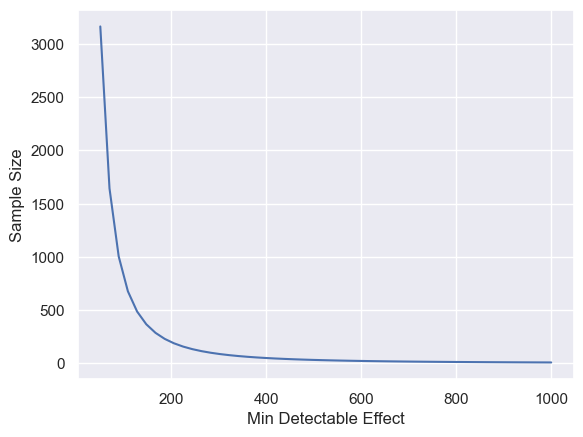

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

ax = sns.lineplot(x=effects, y=sample_sizes)
ax.set(xlabel="Min Detectable Effect", ylabel="Sample Size")
plt.show()

Чем больше выборка, тем более малый эффект мы можем заметить

### Оценка ошибок 1 и 2 рода для определенного критерия и размера выборки

С помощью синтетических А/А и А/Б экспериментов оценим вероятности ошибок и построим доверительные интервалы:

In [9]:
from scipy import stats


def run_synthetic_experiments(values, sample_size, effect=0, n_iter=10000):
    """Проводим синтетические эксперименты, возвращаем список p-value."""
    pvalues = []
    for _ in range(n_iter):
        a, b = np.random.choice(
            values,
            size=(2, sample_size),
            replace=True,
        )
        b += effect
        pvalue = stats.ttest_ind(a, b).pvalue
        pvalues.append(pvalue)
    return np.array(pvalues)


def print_estimated_errors(pvalues_aa, pvalues_ab, alpha):
    """Оценивает вероятности ошибок."""
    est_fte = np.mean(pvalues_aa < alpha)
    est_ste = np.mean(pvalues_ab >= alpha)
    ci_first = estimate_ci_bernoulli(est_fte, len(pvalues_aa))
    ci_second = estimate_ci_bernoulli(est_ste, len(pvalues_ab))

    print(f"Оценка вероятности ошибки I рода = {est_fte:0.4f}")
    print(f"  Доверительный интервал = [{ci_first[0]:0.4f}, {ci_first[1]:0.4f}]")
    print(f"Оценка вероятности ошибки II рода = {est_ste:0.4f}")
    print(f"  Доверительный интервал = [{ci_second[0]:0.4f}, {ci_second[1]:0.4f}]")


def estimate_ci_bernoulli(p, n, alpha=0.05):
    """Доверительный интервал для Бернуллиевской случайной величины."""
    t = stats.norm.ppf(1 - alpha / 2, loc=0, scale=1)
    std_n = np.sqrt(p * (1 - p) / n)
    return p - t * std_n, p + t * std_n


pvalues_aa = run_synthetic_experiments(values, sample_size, effect=0)
pvalues_ab = run_synthetic_experiments(values, sample_size, effect=effect)
print_estimated_errors(pvalues_aa, pvalues_ab, alpha)

Оценка вероятности ошибки I рода = 0.0947
  Доверительный интервал = [0.0890, 0.1004]
Оценка вероятности ошибки II рода = 0.2019
  Доверительный интервал = [0.1940, 0.2098]


### Функция распределения p-value

#### Если верна нулевая гипотеза

Для любого $\alpha \in[0,1]$ выполняется $\mathbb{P}\left(\right.$ p-value $\left.<\alpha \mid H_0\right)=\alpha$

Почему так? Да потому что это функция равномерного распределения от 0 до 1

#### Если верна альтернативная гипотеза

Ошибка 2 рода : $\mathbb{P}\left(\right.$ p-value $\left.\geq \alpha \mid H_1\right)=\beta$

$\mathbb{P}\left(\right.$ p-value $\left.<\alpha \mid H_1\right)=1-\beta$

Тут уже не равномерное. Но получается, график функции распределения p-value при верности альтернативной гипотезы должен проходить через точку $\mathbb{[\alpha, 1 - \beta]}$


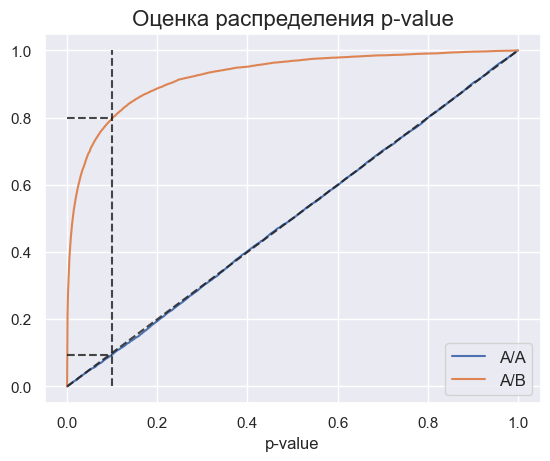

In [10]:
import matplotlib.pyplot as plt


def plot_pvalue_distribution(pvalues_aa, pvalues_ab, alpha, beta):
    """Рисует графики распределения p-value."""
    estimated_first_type_error = np.mean(pvalues_aa < alpha)
    estimated_second_type_error = np.mean(pvalues_ab >= alpha)
    y_one = estimated_first_type_error
    y_two = 1 - estimated_second_type_error
    X = np.linspace(0, 1, 1000)
    Y_aa = [np.mean(pvalues_aa < x) for x in X]
    Y_ab = [np.mean(pvalues_ab < x) for x in X]

    plt.plot(X, Y_aa, label="A/A")
    plt.plot(X, Y_ab, label="A/B")
    plt.plot([alpha, alpha], [0, 1], "--k", alpha=0.8)
    plt.plot([0, alpha], [y_one, y_one], "--k", alpha=0.8)
    plt.plot([0, alpha], [y_two, y_two], "--k", alpha=0.8)
    plt.plot([0, 1], [0, 1], "--k", alpha=0.8)

    plt.title("Оценка распределения p-value", size=16)
    plt.xlabel("p-value", size=12)
    plt.legend(fontsize=12)
    plt.show()


plot_pvalue_distribution(pvalues_aa, pvalues_ab, alpha, beta)

- Диагональная из точки [0, 0] в точку [1, 1] – это функция распределения равномерного распределения на отрезке от 0 до 1, по ней можно визуально оценивать равномерность распределения p-value;

- Вертикальная линия с $x=\alpha$ – пороговое значение p-value, по которому определяем, отвергать нулевую гипотезу или нет. Проекция на ось ординат точки пересечения вертикальной линии с функцией распределения p-value для А/А тестов – это вероятность ошибки первого рода. Проекция точки пересечения вертикальной линии с функцией распределения p-value для А/Б тестов – это мощность теста (мощность = $1 - \beta$). 

- Две горизонтальные линии – проекции на ось ординат точки пересечения вертикальной линии с функцией распределения p-value для А/А и А/Б тесто

#### Некорректный критерий

Тест стьюдента сверху правильно зафиксировал ошибку первого и второго рода. Может быть, все критерии всегда работаю корректно, и нет смысла каждый раз проверять вероятности ошибок?


Допустим, мы решили увеличить продолжительность эксперимента до 2-х недель.

- Для каждого пользователя будем вычислять стоимость покупок за первую неделю и стоимость покупок за второю неделю

- Полученные стоимости будем передавать в тест Стьюдента для проверки значимости отличий

- Положим, что поведение пользователей повторяется от недели к неделе, и стоимости покупок одного пользователя совпадают (сезонность!)

Оценка вероятности ошибки I рода = 0.2432
  Доверительный интервал = [0.2348, 0.2516]
Оценка вероятности ошибки II рода = 0.0936
  Доверительный интервал = [0.0879, 0.0993]


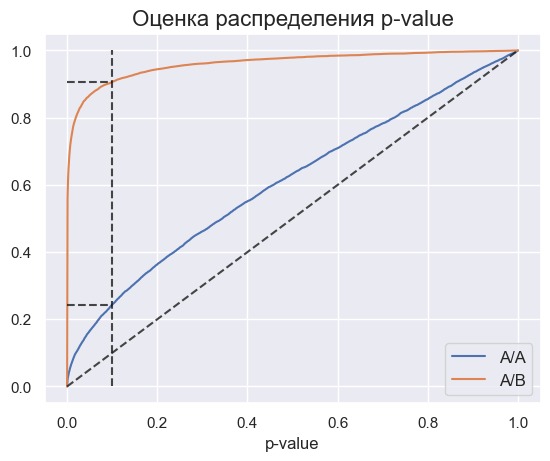

In [11]:
def run_synthetic_experiments_two(values, sample_size, effect=0, n_iter=10000):
    """Проводим синтетические эксперименты на двух неделях."""
    pvalues = []
    for _ in range(n_iter):
        a, b = np.random.choice(
            values,
            size=(2, sample_size),
            replace=False,
        )
        b += effect
        # дублируем данные
        a = np.hstack((a, a))
        b = np.hstack((b, b))
        pvalue = stats.ttest_ind(a, b).pvalue
        pvalues.append(pvalue)
    return np.array(pvalues)


pvalues_aa_dep = run_synthetic_experiments_two(values, sample_size)
pvalues_ab_dep = run_synthetic_experiments_two(values, sample_size, effect=effect)
print_estimated_errors(pvalues_aa_dep, pvalues_ab_dep, alpha)
plot_pvalue_distribution(pvalues_aa_dep, pvalues_ab_dep, alpha, beta)

В этом примере тест Стьюдента работает некорректно, так как данные зависимые (стоимости покупок одного человека зависимы). 
Если бы мы сразу не догадались про зависимость данных, то оценка вероятностей ошибок помогла бы нам понять, что такой тест некорректен.

Таким образом:

- Корректный критерий – это критерий, у которого вероятности ошибок первого и второго рода равны допустимым вероятностям ошибок первого и второго рода соответственно;

- Чтобы критерий контролировал вероятность ошибки первого рода для любого уровня значимости, необходимо и достаточно, чтобы p-value при верности нулевой гипотезы был распределен равномерно от 0 до 1.

### Анализ мощности критериев

Анализ мощности с помощью бутстрапа может быть полезен для подведения результатов эксперимента.
Например, могут быть случаи, когда заранее остановили A/B-тест, потому что он прокрасился в положительную сторону, но после анализа мощности выяснится, что корректно принять H1 можно на уровне 50%, что сравнимо c подбрасыванием монетки.

Computing power: 100%|██████████| 5/5 [02:04<00:00, 24.83s/it]


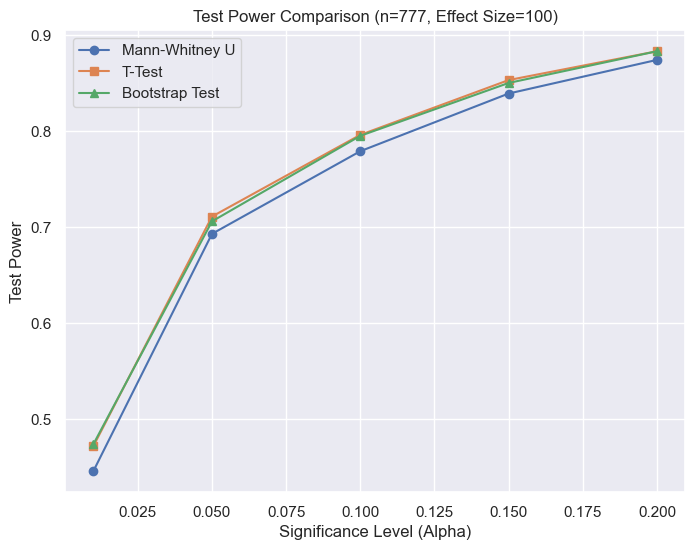

In [79]:
def bootstrap_test(group1, group2, boot_iter=1000):
    diffs = []
    for _ in range(boot_iter):
        new_group1 = np.random.choice(group1, len(group1), replace=True)
        new_group2 = np.random.choice(group2, len(group2), replace=True)
        diffs.append(np.mean(new_group2) - np.mean(new_group1))

    quant = stats.norm.cdf(x=0, loc=np.mean(diffs), scale=np.std(diffs))
    return quant * 2 if np.mean(diffs) > 0 else (1 - quant) * 2


t_test_powers = []
mann_whitney_powers = []
bootstrap_powers = []

alpha_levels = [0.01, 0.05, 0.1, 0.15, 0.2]

for alpha_level in tqdm(alpha_levels, desc="Computing power"):
    mann_whitney_p = []
    t_test_p = []
    bootstrap_p = []
    for _ in range(1000):
        group1 = np.random.choice(values, sample_size, replace=True)
        group2 = np.random.choice(values, sample_size, replace=True) + effect

        t_test_p.append(stats.ttest_ind(group1, group2)[1])
        mann_whitney_p.append(stats.mannwhitneyu(group1, group2)[1])
        bootstrap_p.append(bootstrap_test(group1, group2))

    t_test_powers.append(np.mean(np.array(t_test_p) < alpha_level))
    mann_whitney_powers.append(np.mean(np.array(mann_whitney_p) < alpha_level))
    bootstrap_powers.append(np.mean(np.array(bootstrap_p) < alpha_level))

plt.figure(figsize=(8, 6))
plt.plot(alpha_levels, mann_whitney_powers, marker="o", label="Mann-Whitney U")
plt.plot(alpha_levels, t_test_powers, marker="s", label="T-Test")
plt.plot(alpha_levels, bootstrap_powers, marker="^", label="Bootstrap Test")
plt.xlabel("Significance Level (Alpha)")
plt.ylabel("Test Power")
plt.title(f"Test Power Comparison (n={sample_size}, Effect Size={effect})")
plt.legend()
plt.show()

Computing power: 100%|██████████| 5/5 [02:06<00:00, 25.39s/it]


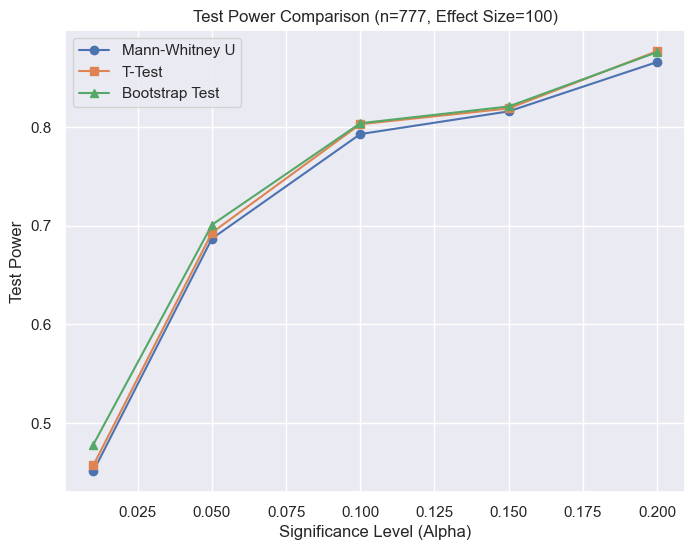

In [82]:
import numpy as np


def empirical_cdf_value(data, x):
    # Сортируем данные
    sorted_data = np.sort(data)
    # Ищем индекс первого значения, большего или равного x
    idx = np.searchsorted(sorted_data, x)
    # Если x больше всех значений в данных, возвращаем 1
    if idx == len(sorted_data):
        return 1
    # Если x меньше всех значений в данных, возвращаем 0
    if idx == 0:
        return 0
    # Вычисляем значение cdf как количество наблюдений, меньших или равных x, деленное на общее количество наблюдений
    y = (idx - 1) / len(data)
    return y


def bootstrap_test(group1, group2, boot_iter=1000):
    diffs = []
    for _ in range(boot_iter):
        new_group1 = np.random.choice(group1, len(group1), replace=True)
        new_group2 = np.random.choice(group2, len(group2), replace=True)
        diffs.append(np.mean(new_group2) - np.mean(new_group1))
    quant = empirical_cdf_value(diffs, x=0)
    return quant * 2 if 0 < np.mean(diffs) else (1 - quant) * 2


t_test_powers = []
mann_whitney_powers = []
bootstrap_powers = []

alpha_levels = [0.01, 0.05, 0.1, 0.15, 0.2]

for alpha_level in tqdm(alpha_levels, desc="Computing power"):
    mann_whitney_p = []
    t_test_p = []
    bootstrap_p = []
    for _ in range(1000):
        group1 = np.random.choice(values, sample_size, replace=True)
        group2 = np.random.choice(values, sample_size, replace=True) + effect

        t_test_p.append(stats.ttest_ind(group1, group2)[1])
        mann_whitney_p.append(stats.mannwhitneyu(group1, group2)[1])
        bootstrap_p.append(bootstrap_test(group1, group2))

    t_test_powers.append(np.mean(np.array(t_test_p) < alpha_level))
    mann_whitney_powers.append(np.mean(np.array(mann_whitney_p) < alpha_level))
    bootstrap_powers.append(np.mean(np.array(bootstrap_p) < alpha_level))

plt.figure(figsize=(8, 6))
plt.plot(alpha_levels, mann_whitney_powers, marker="o", label="Mann-Whitney U")
plt.plot(alpha_levels, t_test_powers, marker="s", label="T-Test")
plt.plot(alpha_levels, bootstrap_powers, marker="^", label="Bootstrap Test")
plt.xlabel("Significance Level (Alpha)")
plt.ylabel("Test Power")
plt.title(f"Test Power Comparison (n={sample_size}, Effect Size={effect})")
plt.legend()
plt.show()